In [1]:
#Importing the liabraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [2]:
# importing the data set
df=pd.read_csv('/Users/iamasifaftab/Downloads/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

In [3]:
# checking the data type and count of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Checking the statistical measures of numerical data type like: mean,median,min and max etc.
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# counting the null values in data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Target

<AxesSubplot:xlabel='charges', ylabel='Count'>

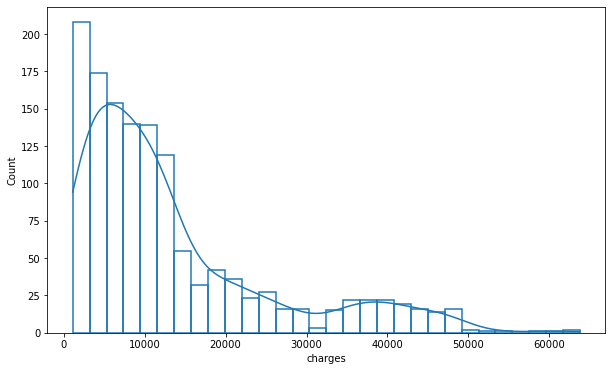

In [6]:
# charges distribution
plt.figure(figsize=(10,6))
sns.histplot(df.charges,kde=True,fill=False)

### 50% of the data have less than USD 10000 insurance charges and very less data have more than USD 50000 insurance charges

<AxesSubplot:xlabel='charges', ylabel='Density'>

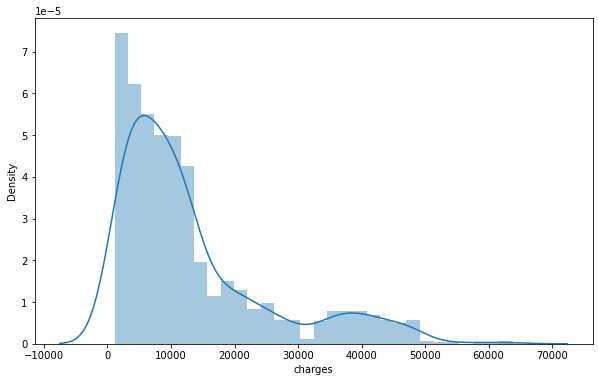

In [7]:
# charges distribution
plt.figure(figsize=(10,6))
sns.distplot(df.charges,kde=True)

<AxesSubplot:xlabel='charges', ylabel='Count'>

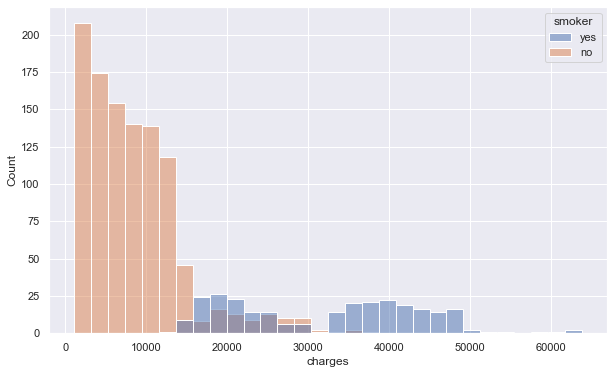

In [8]:
# charges distribution between smoker and non smoker
sns.set()
plt.figure(figsize=(10,6))
sns.histplot(x='charges',hue='smoker',data=df)

### Above diagram shows that the about 50 % People are not smoking and  have Less than USD 15000 insurance charges and above USD 30000 insurance charges are showing for people who are smoking.

# Age

Text(0.5, 1.0, 'Age_Distribution')

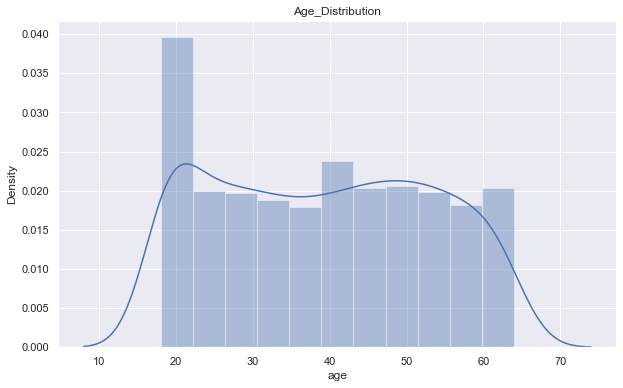

In [9]:
# Distribution of age value
sns.set()
plt.figure(figsize=(10,6))
sns.distplot(df.age)
plt.title('Age_Distribution')

### Above chart shows that the maximum insurance buyers are between 18 to 25 years age group and thereafter is  drop in insurance buyers  and then slightly increase in the age group of between 40 to 45 and after that there is agin slight drop in insurance buyers.

<AxesSubplot:xlabel='age', ylabel='Count'>

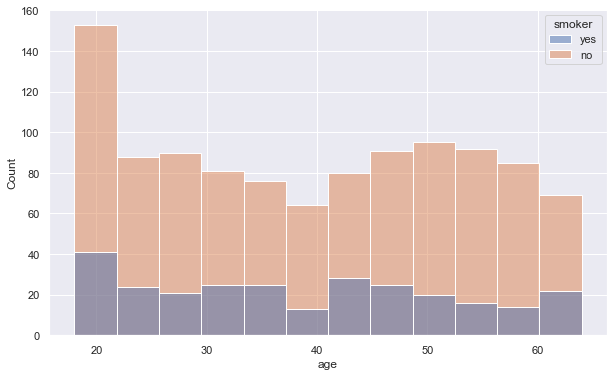

In [10]:
# Age distribution between smoker and non smoker
sns.set()
plt.figure(figsize=(10,6))
sns.histplot(x='age',hue='smoker',data=df)

### Above chart shows that the maximum smokers are in the age group of 18 to 25 and then there is decrease in trend of smokers.

<AxesSubplot:xlabel='age', ylabel='charges'>

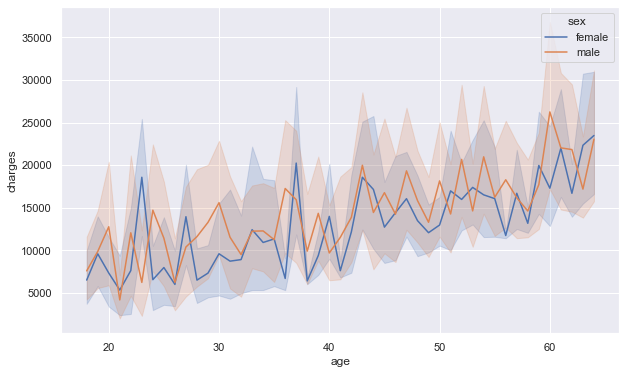

In [11]:
# Age vs charges trend between smokers and non smokers
plt.figure(figsize=(10,6))
sns.lineplot(x='age',y='charges',hue='sex',data=df)

### Above chart shows that around same insurance charges between male and female with respect to age.

<AxesSubplot:xlabel='age', ylabel='bmi'>

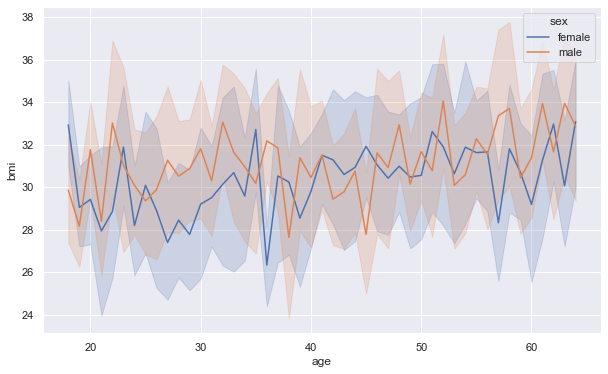

In [12]:
# Age vs BMI trend between smokers and non smokers
plt.figure(figsize=(10,6))
sns.lineplot(x='age',y='bmi',hue='sex',data=df)

### Above chart shows that there are not much difference in BMI of male and female with respect to age. 

<Figure size 1008x576 with 0 Axes>

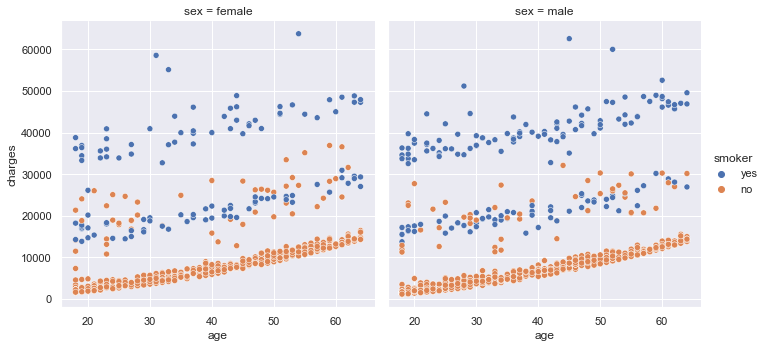

In [13]:
# Age vs charges trend between smokers and non smokers incomparision to male and female 
plt.figure(figsize=(14,8))
sns.relplot(x='age',y='charges',col='sex',hue='smoker',data=df)

### Above chart shows that the insurance charges for non smokers are less than the smokers and there is huge gap in the insurance charges between non smokers and smokers. Insurance charges are increasing with the increase in age.

# Sex

Text(0.5, 1.0, 'Sex Distribution')

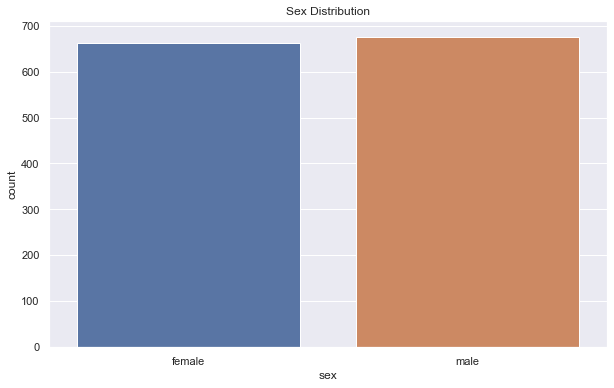

In [14]:
# Gender distribution
plt.figure(figsize=(10,6))
sns.countplot(x='sex',data=df)
plt.title('Sex Distribution')

### Above chart shows that the number of female and male are almost equal in data set.So, the data set is balanced.

In [15]:
# checking the number of counts of male and female 
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

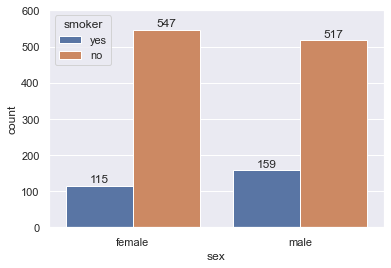

In [16]:
# Gender distribution between smokers and no smokers
ax=sns.countplot(x='sex',hue='smoker',data=df)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1)
ax.margins(y=0.1)

### Above chart shows that the percentage of  smokers in male  are more than the female smokers. 

# BMI

Text(0.5, 1.0, 'BMI Distribution')

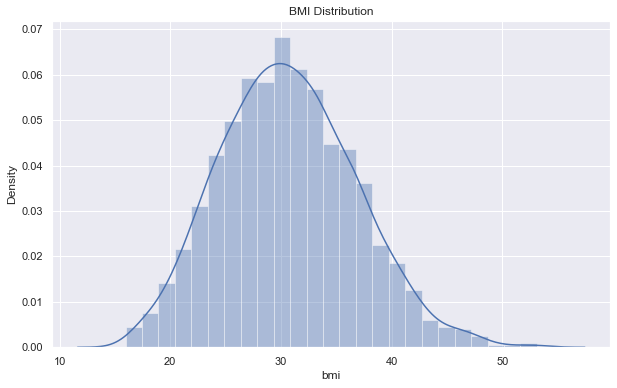

In [17]:
# BMI distribution
sns.set()
plt.figure(figsize=(10,6))
sns.distplot(df.bmi)
plt.title('BMI Distribution')

### Above chart shows that the BMI of 50% the data is below 30 and the highest density of BMI lies at around 30. The data shows that it is normally distributed.

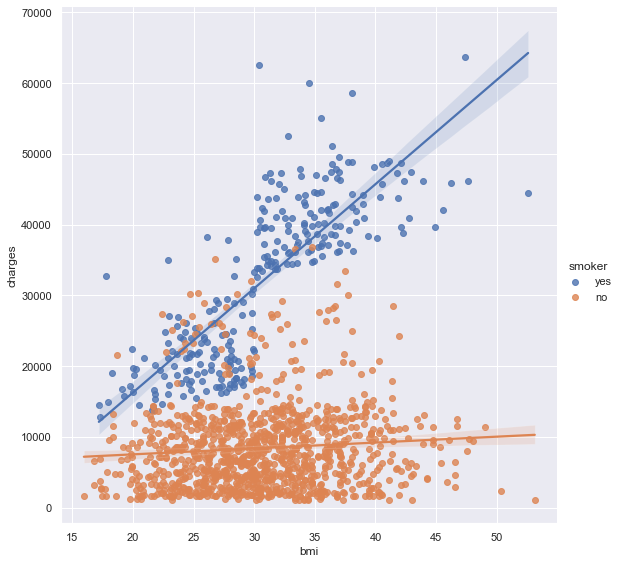

In [18]:
# checking linear model plot of BMI vs Charges between smokers and non smokers
sns.lmplot(x='bmi',y='charges',hue='smoker',data=df,size=8)

### Above chart shows that the Insurance charges remains relatively constant  as BMI increases for non smokers, for smokers insurance charges increases much steeper as BMI increases. 

# Children

Text(0.5, 1.0, 'Children Distribution')

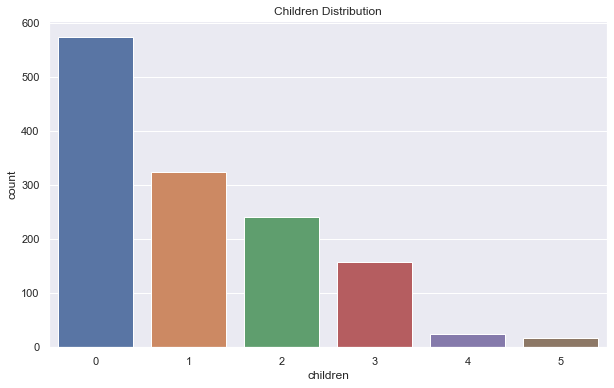

In [19]:
# Children count distribution
sns.set()
plt.figure(figsize=(10,6))
sns.countplot(x='children',data=df)
plt.title('Children Distribution')

### Above chart shows that almost 40% people have no children and very less people have 4 and 5 children.

In [20]:
# # checking the number of counts of children.
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

# Smoker

Text(0.5, 1.0, 'Smoker Distribution')

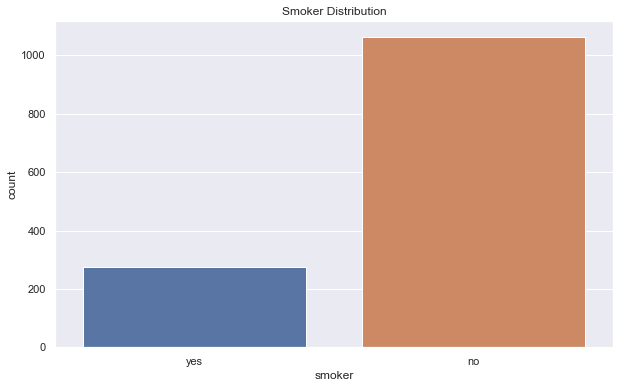

In [21]:
# Smokers distribution
sns.set()
plt.figure(figsize=(10,6))
sns.countplot(x='smoker',data=df)
plt.title('Smoker Distribution')

### Above chart shows that the around 80% people are not smoking.

In [22]:
# checking the count of smokers vs non smokers
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

# Region

In [23]:
# Checking the unique values of region
df.region.nunique()

4

Text(0.5, 1.0, 'Region Distribution')

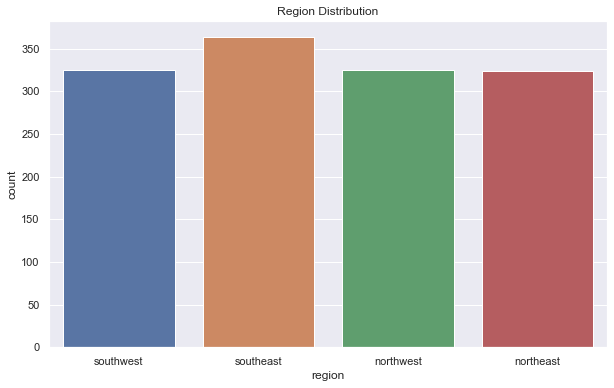

In [24]:
# Region distribution
sns.set()
plt.figure(figsize=(10,6))
sns.countplot(x='region',data=df)
plt.title('Region Distribution')

### Above chart shows that the data between the region are almost equally distributed.

# Pairplot

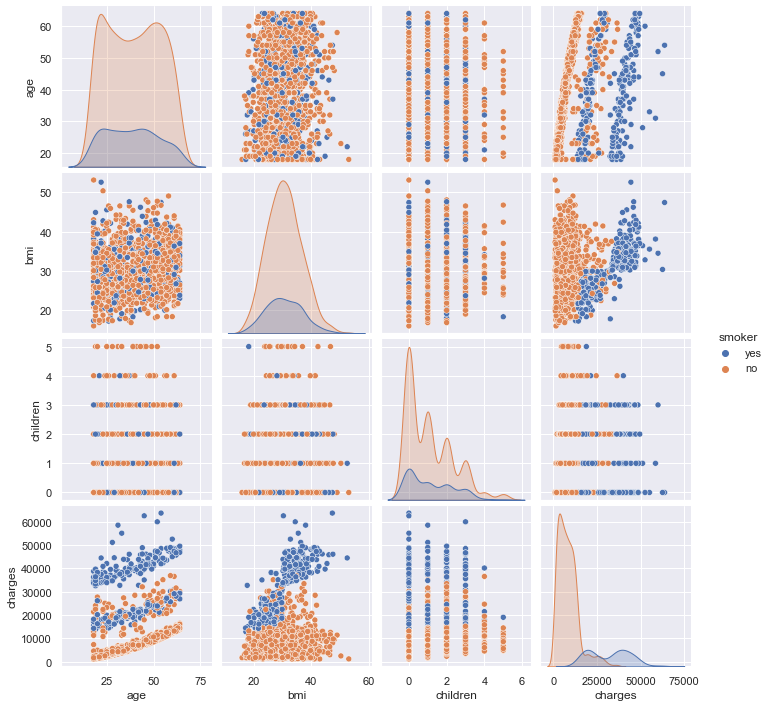

In [25]:
# Plotting pairplot with Smoker
sns.pairplot(data=df, hue='smoker')

### Above chart shows that the charges and age are linearly correlated.

# Preprocessing

In [26]:
# encoding the categorical feature with dummies variable
df=pd.get_dummies(df)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


# Correlation

In [27]:
# cgecking the correlation of th dataframe
correlation=df.corr()
correlation.sort_values(['charges'], ascending=False, inplace=True)
print(correlation.charges)

charges             1.000000
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southwest   -0.043210
sex_female         -0.057292
smoker_no          -0.787251
Name: charges, dtype: float64


<AxesSubplot:>

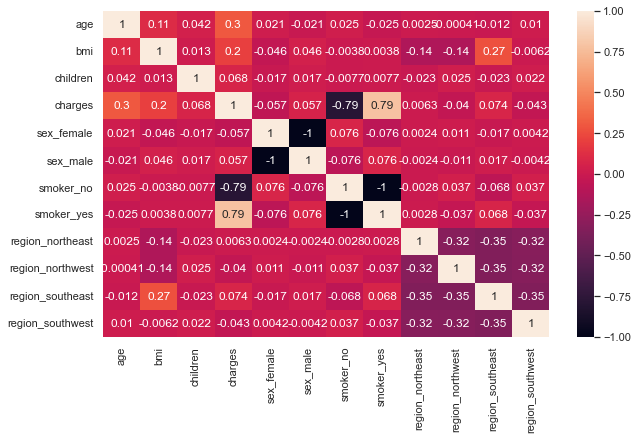

In [28]:
# plotting the heat map for correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

### Smoking has the strong positive correlation. Age and BMI have weak positive correlation but other features have very weak correlation.

# Skewness

In [29]:
# Checking the skewness of the dataframe
df.skew()

age                 0.055673
bmi                 0.284047
children            0.938380
charges             1.515880
sex_female          0.020951
sex_male           -0.020951
smoker_no          -1.464766
smoker_yes          1.464766
region_northeast    1.205161
region_northwest    1.200409
region_southeast    1.025621
region_southwest    1.200409
dtype: float64

### Region, Charges and Smokers features are highly skewed while Children is moderately positive skewed and other features have fairly symmetric distribution.

# Prediction

In [30]:
# selecting the feature as X and target as Y
X=df.drop('charges',axis=1)
Y=df.charges

In [31]:
# Splitting the dataset into training data and testing data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [32]:
# checking the size of training and testing split
print(f'shape of x_train is :', x_train.shape)
print(f'shape of y_train is :',y_train.shape)
print(f'shape of x_test is :',x_test.shape)
print(f'shape of y_test is :',y_test.shape)

shape of x_train is : (1070, 11)
shape of y_train is : (1070,)
shape of x_test is : (268, 11)
shape of y_test is : (268,)


In [33]:
# loading the linear regression mode and fitting the linear model using x_training and y_training
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [34]:
# checking the coefficient of the feature
lm.coef_

array([   251.22566407,    332.82271398,    587.9253102 ,     18.56120037,
          -18.56120037, -11956.17261513,  11956.17261513,    527.72812674,
          148.53816329,   -256.75623287,   -419.51005716])

In [35]:
# prediction on the testing data
y_pr=lm.predict(x_test)

In [36]:
# prediction on the training data
y_pr_train=lm.predict(x_train)

Text(0, 0.5, 'y_pr')

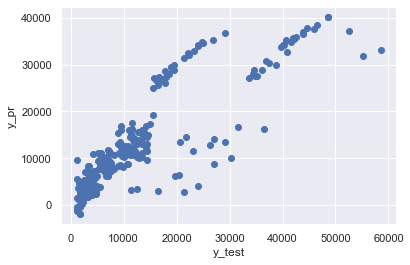

In [37]:
# plotting the scatter plot of testing data and prediction data to check the model
plt.scatter(x=y_test,y=y_pr)
plt.xlabel('y_test')
plt.ylabel('y_pr')

<AxesSubplot:xlabel='charges'>

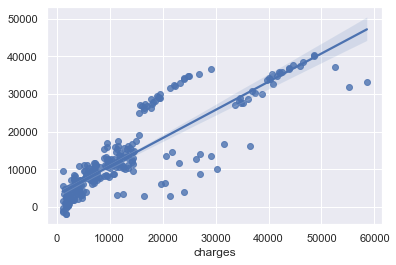

In [38]:
# plotting the regression line using the testing data and prediction data
sns.regplot(y_test,y_pr)

In [39]:
# checking the mean absolute error , meansquared error and root mean squared error
from sklearn import metrics 
print('MAE : ', metrics.mean_absolute_error(y_test,y_pr))
print('MSE : ', metrics.mean_squared_error(y_test,y_pr))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_pr)))

MAE :  4279.860834219367
MSE :  38304871.34868592
RMSE :  6189.092934242135


In [40]:
# checking the r_square score on training data 
metrics.r2_score(y_train,y_pr_train)

0.7520187377309014

In [41]:
# checking the r_square score on testing data 
metrics.r2_score(y_test,y_pr)

0.7449415564623687

### It shows that the model good fit as r_square score on train data and test data are almost equal.

<AxesSubplot:xlabel='charges', ylabel='Density'>

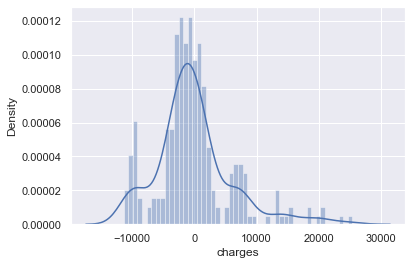

In [42]:
# plotting the distribution plot for residuals
sns.distplot((y_test-y_pr),bins=50)

### Above chart shows that the insurance charges residuals are almost normally distributed.

In [43]:
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


# Building a predictive system

In [44]:
# inputing the data
input_data=(18,31.920,0,1,0,1,0,1,0,0,0)

In [45]:
# changing input_data to a numpy array
input_data_numpy_array=np.asarray(input_data)
input_data_numpy_array

array([18.  , 31.92,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,
        0.  ,  0.  ])

In [46]:
# reshaping the array
input_data_reshape=input_data_numpy_array.reshape(1,-1)
input_data_reshape

array([[18.  , 31.92,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  ]])

In [47]:
# predicting the insurance charge
prediction=lm.predict(input_data_reshape)
prediction[0]

3386.5093084334626

# Building another model to predict the insurance charges

In [48]:
# importing the library
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [49]:
# loading the dataset
df=pd.read_csv('/Users/iamasifaftab/Downloads/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
# Encoding the categorical variable using label encoder
le=LabelEncoder()
df.sex=le.fit_transform(df.sex)
df.smoker=le.fit_transform(df.smoker)
df.region=le.fit_transform(df.region)

In [51]:
# selecting the feature as X and target as Y
X=df.drop('charges',axis=1)
Y=df.charges

In [52]:
# Splitting the dataset into training data and testing data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [53]:
# Generating a new feature matrix consisting of all polynomial combinations of the features with degree equal to 2
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X)


In [54]:
# Using regression trees to fit the model
model = ExtraTreesRegressor(random_state=1, 
                            n_estimators=150,
                            min_samples_split=3,
                            max_features='log2',
                            max_depth=10)

model.fit(x_train, y_train)
prediction = model.predict(x_test)

In [55]:
# predicting the accuracy score of the testing data
model.score(x_test, y_test)

0.8537343195789426

In [56]:
# predicting the accuracy score of the training data
model.score(x_train,y_train)

0.9200912106640902

### Accuracy score of training data is much more than the testing data. so the model is overfit.

In [57]:
# printing the dataframe
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# Building a predictive system

In [58]:
# inputing the data
input_data=(18,0,31.920,0,0,0)

In [59]:
# changing input_data to a numpy array
input_data_numpy_array=np.asarray(input_data)
input_data_numpy_array

array([18.  ,  0.  , 31.92,  0.  ,  0.  ,  0.  ])

In [60]:
# reshaping the array
input_data_reshape=input_data_numpy_array.reshape(1,-1)
input_data_reshape

array([[18.  ,  0.  , 31.92,  0.  ,  0.  ,  0.  ]])

In [61]:
# predicting the insurance charge
prediction=model.predict(input_data_reshape)
prediction[0]

5194.5402461821395

### So we can see that linear regression model is best fit for this data set as it predicting insurance charges better than the regression tress model.